# The House Price Prediction Problem

**Name:** Zeeshan Asim Ather

**Roll No.:** D21038

## Problem Statement:

The House Price Prediction Problem

In this problem, you will be given a dataset that records the house prices of 9,761 houses in King County, Washington, US. The house prices are recorded along with some other attributes like - area of the house, number of bedrooms, number of bathrooms, etc. You are required to do the following tasks:


1) Question the data - Understand the variables very carefully and formulate your questions/hypothesis. (Note that these are just your initial hypothesis which may or may not seem to be true after the EDA step)

2) EDA - explore the dataset very carefully. Do univariate analysis and bivariate analysis by choosing appropriate graphs, charts and descriptive measures. Report the surprising elements (i.e. the one which you believed would be true in step 1 did not turn out t be true, or a result that was beyond your expectation, etc.)

3) Initial model fitting step - FIt a couple of linear regression models by considering different sets of predictors on the training dataset. Argue the reasons for considering those predictor sets. Report 10-fold cross-validation RMSE and R-squared values. Discuss the results.

4) Feature engineering - (A) Suggest some possible feature transformations (like log(X), sqrt(X), X^2, X1*X2, etc.) with reasons, which you believe could have improved the performances of the previous models. Experiment to check if such transformations actually help to do so. (B) suggest some new feature generation techniques (e.g. creating dummy variables, or using one-hot encoding, or transforming an existing feature to a new feature as you may convert the variable 'year built' to the 'age of the house'. Check if such transformations help in improving the performances of the models. Report the RMSE and R-squared values in each case.

5) Model fitting step 2 - You may use model selection methods like (forward selection or backward elimination methods) to select an appropriate model.

6) Model fitting step 3 - Experiment and check if a decision tree model can be used to fit the data mode accurately. You are free to use any kind of hyperparameter tuning to fit the model. Experiment using all the feature sets you have created before (including all the transformed sets and new feature-generated sets).

7) Model testing - Consider the best competing models and test their performances on the test data. Report the results.

### Table of Contents:

1. <b>[Question the data](#0)</b> 


2. <b>[EDA](#1)</b> 

[(a) Univariate Analysis](#2)
   
[(b) Bivariate Analysis](#3)

[(c) Observations based on EDA](#4)

3. <b>[Initial model fitting step](#5)</b> 

[(a) Model -1 ](#6)

[(b) Model - 2](#7)

4. <b>[Feature Engineering](#8)</b> 

[(a) Feature Transformation](#9)

[(b) New Feature Generation](#10)

5. <b>[Model fitting step - 2](#11)</b> 

[(a) Forward Selection](#12)

[(b) Backward Elimination](#13)

6. <b>[Model fitting step - 3](#14)</b> 


7. <b>[Model Testing](#15)</b> 

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import OneHotEncoder

# Reading the train dataset
house = pd.read_csv(r"E:\Data Science\D21- IML- Introduction to Machine Learning\kc_house_train_data.csv")

pd.set_option("display.max_columns", None)

In [134]:
house["date"] = pd.to_datetime(house["date"])

## 1) Question the data <a id='0' >  </a>

The dataset kc_house_train_data has 21 columns namely 
                 
                 ['id','date','price',
                 
                 'bedrooms','bathrooms','sqft_living',
                 
                 'sqft_lot','floors','waterfront',
                 
                 'view','condition','grade',
               
               'sqft_above','sqft_basement','yr_built',
             
             'yr_renovated','zipcode','lat',
             
             'long','sqft_living15','sqft_lot15']

The initial inferences/hypothesis that can be made from the dataset are as follows:

1. sqft_living and sqft_lot will have a significant impact on price of the house.


2. No.of bedrooms and bathrooms can be a deciding factor of the price.


3. Age of the house (based on yr_built), renovations(if any), grade and condition will affect house price.


4. Presence of waterfront, view of the house might have little impact on house price.


5. Theoretically, latitude and longitude, zipcode will determine the location which in turn affects the house price. However in a Regression model, latitude, longitude and zipcode cannot be used as is because there's no established relationship that a unit change in latitude/longitude and pincode will result in some units change in Price of the house. Their effect can be better captured in Clustering models.


6. No.of floors, presence or absence of basement i.e sqft_basement and sqft_above might bring slight changes to House price.

## 2) EDA   <a id='1' >  </a>

### Univariate Analysis: <a id='2' >  </a>

In [3]:
# List of continuous features
Continuous = ["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]

# List of discrete(also binary categorical) features
Discrete = ["bedrooms","bathrooms","floors","waterfront","view","condition","grade"]

#### Sqft_living:

In [4]:
# To get all aggregate functions.
house["sqft_living"].describe()

count     9761.000000
mean      2086.734146
std        927.194303
min        290.000000
25%       1420.000000
50%       1910.000000
75%       2570.000000
max      12050.000000
Name: sqft_living, dtype: float64

In [5]:
# Outlier analysis

# Quartile-3
Q3 = house["sqft_living"].quantile(0.75)
# Quartile-1
Q1 = house["sqft_living"].quantile(0.25)

# Inter-quartile range
IQR = Q3-Q1

# Upper bound after which datapoints are considered Outliers
Out1 = Q3 + 1.5*IQR
# Lower bound below which datapoints are considered Outliers
Out2 = Q1 - 1.5*IQR

Out1,Out2,IQR

(4295.0, -305.0, 1150.0)

#### Sqft_lot:

In [6]:
# To get all aggregate functions.
house["sqft_lot"].describe()

count    9.761000e+03
mean     1.521526e+04
std      4.126673e+04
min      5.200000e+02
25%      5.100000e+03
50%      7.642000e+03
75%      1.066000e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [7]:
# Outlier analysis

# Quartile-3
Q3 = house["sqft_lot"].quantile(0.75)
# Quartile-1
Q1 = house["sqft_lot"].quantile(0.25)

# Inter-quartile range
IQR = Q3-Q1

# Upper bound after which datapoints are considered Outliers
Out1 = Q3 + 1.5*IQR
# Lower bound below which datapoints are considered Outliers
Out2 = Q1 - 1.5*IQR

Out1,Out2,IQR

(19000.0, -3240.0, 5560.0)

#### Plotting Histogram and Boxplots of Continuous variables:

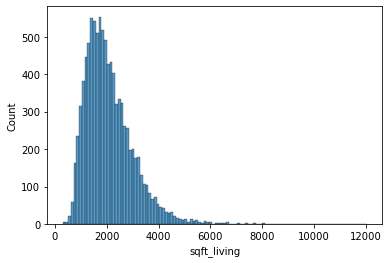

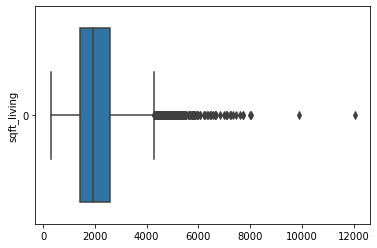

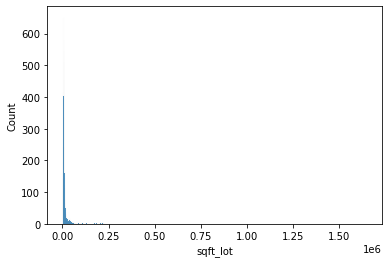

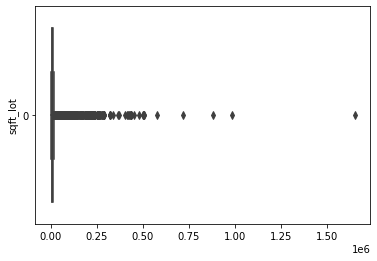

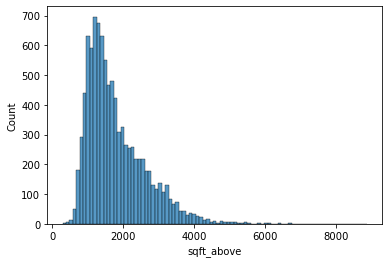

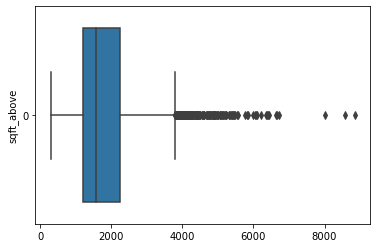

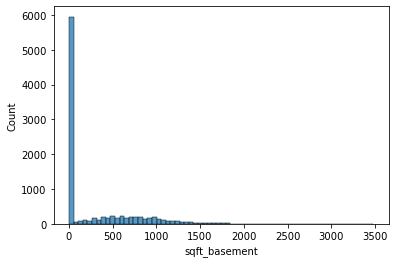

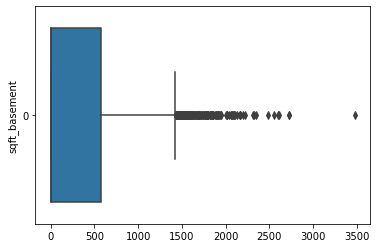

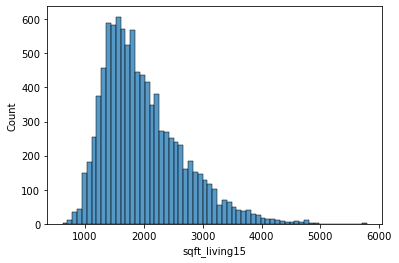

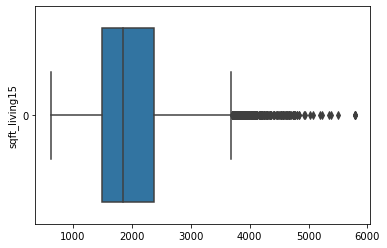

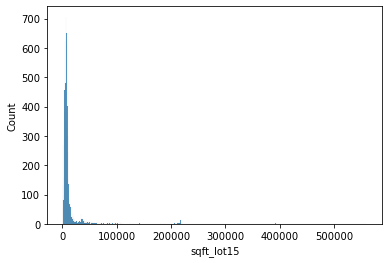

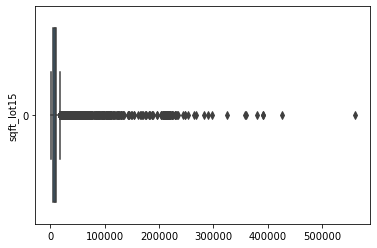

In [8]:
for i in Continuous:
    sns.histplot(data = house[i])
    plt.show()
    sns.boxplot(data = house[i],orient = "h")
    plt.ylabel("%s"%i)
    plt.show()

#### Bedrooms:

In [9]:
# To get all aggregate functions.
house["bedrooms"].describe()

count    9761.000000
mean        3.375884
std         0.960697
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        33.000000
Name: bedrooms, dtype: float64

In [10]:
# Outlier analysis

# Quartile-3
Q3 = house["bedrooms"].quantile(0.75)
# Quartile-1
Q1 = house["bedrooms"].quantile(0.25)

# Inter-quartile range
IQR = Q3-Q1

# Upper bound after which datapoints are considered Outliers
Out1 = Q3 + 1.5*IQR
# Lower bound below which datapoints are considered Outliers
Out2 = Q1 - 1.5*IQR

Out1,Out2,IQR

(5.5, 1.5, 1.0)

In [125]:
house.loc[house["bedrooms"] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft_living,log_sqft_lot,Difference in area,No.of years
2228,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000,5.966147,8.682708,5510,68
3177,2954400190,20140624T000000,1300000.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,8.478452,10.240245,23198,31
4472,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,7.807917,8.993303,5589,31
4507,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,7.293018,8.476371,3330,25
8338,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341,5.950643,12.271130,213060,18
8840,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,5.669881,9.946308,20585,58


In [127]:
house.loc[house["bedrooms"] > 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft_living,log_sqft_lot,Difference in area,No.of years
1943,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,3,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450,8.210668,8.389360,720,113
3909,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,8.306472,8.780173,2454,25
4011,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1,98106,47.5560,-122.363,1420,4960,8.006368,8.509161,1960,103
6876,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,8.191463,9.385469,8304,63
7204,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,7.390181,8.699515,4380,74
8363,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,3,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400,7.944492,8.407378,1660,103


#### Floors:

In [11]:
# To get all aggregate functions.
house["floors"].describe()

count    9761.000000
mean        1.486067
std         0.532317
min         1.000000
25%         1.000000
50%         1.500000
75%         2.000000
max         3.500000
Name: floors, dtype: float64

In [12]:
# Outlier analysis

# Quartile-3
Q3 = house["floors"].quantile(0.75)
# Quartile-1
Q1 = house["floors"].quantile(0.25)

# Inter-quartile range
IQR = Q3-Q1

# Upper bound after which datapoints are considered Outliers
Out1 = Q3 + 1.5*IQR
# Lower bound below which datapoints are considered Outliers
Out2 = Q1 - 1.5*IQR

Out1,Out2,IQR

(3.5, -0.5, 1.0)

#### Bathrooms:

In [13]:
# To get all aggregate functions.
house["bathrooms"].describe()

count    9761.000000
mean        2.117175
std         0.773971
min         0.000000
25%         1.750000
50%         2.250000
75%         2.500000
max         8.000000
Name: bathrooms, dtype: float64

In [14]:
# Outlier analysis

# Quartile-3
Q3 = house["bathrooms"].quantile(0.75)
# Quartile-1
Q1 = house["bathrooms"].quantile(0.25)

# Inter-quartile range
IQR = Q3-Q1

# Upper bound after which datapoints are considered Outliers
Out1 = Q3 + 1.5*IQR
# Lower bound below which datapoints are considered Outliers
Out2 = Q1 - 1.5*IQR

Out1,Out2,IQR

(3.625, 0.625, 0.75)

#### Waterfront:

In [15]:
# To get all aggregate functions.
house["waterfront"].describe()

count    9761.000000
mean        0.008401
std         0.091275
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: waterfront, dtype: float64

In [16]:
# Class wise count of houses.
house['waterfront'].value_counts()

0    9679
1      82
Name: waterfront, dtype: int64

#### View:

In [17]:
# To get all aggregate functions.
house["view"].describe()

count    9761.000000
mean        0.248028
std         0.787877
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: view, dtype: float64

In [18]:
# Class wise count of houses.
house['view'].value_counts()

0    8748
2     454
3     243
1     160
4     156
Name: view, dtype: int64

#### Condition:

In [19]:
# To get all aggregate functions.
house["condition"].describe()

count    9761.000000
mean        3.415531
std         0.650552
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: condition, dtype: float64

In [20]:
# Class wise count of houses.
house["condition"].value_counts()

3    6291
4    2610
5     772
2      78
1      10
Name: condition, dtype: int64

#### Grade:

In [21]:
# To get all aggregate functions.
house["grade"].describe()

count    9761.00000
mean        7.66151
std         1.18268
min         1.00000
25%         7.00000
50%         7.00000
75%         8.00000
max        13.00000
Name: grade, dtype: float64

In [22]:
# Class wise count of houses.
house["grade"].value_counts()

7     4067
8     2707
9     1192
6      914
10     532
11     172
5      107
12      45
4       17
13       7
1        1
Name: grade, dtype: int64

### Bivariate Analysis:   <a id='3' >  </a>

#### Relation between Price and Discrete variables:

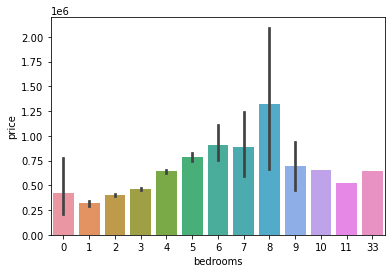

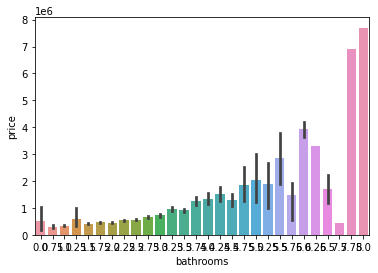

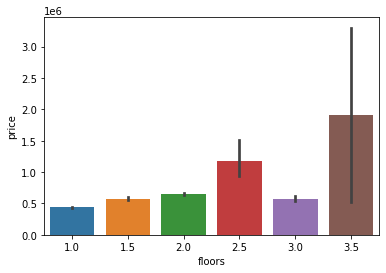

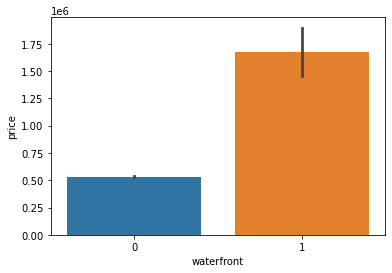

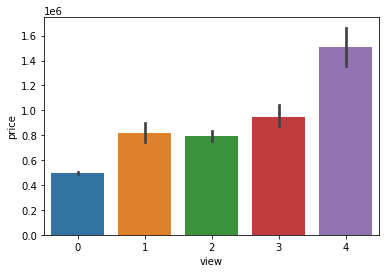

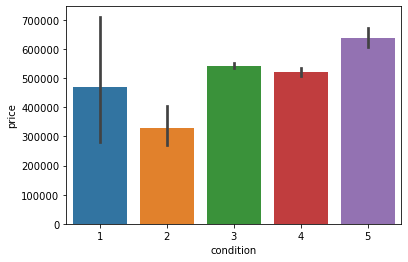

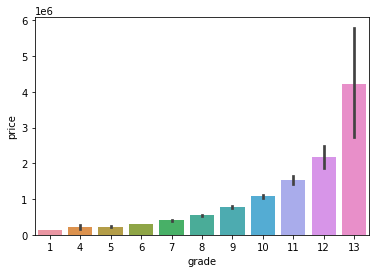

In [23]:
for i in Discrete:
    sns.barplot(x=house[i],y=house["price"])
    plt.show()

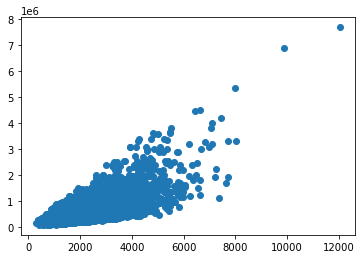

In [24]:
# A scatter plot between house price and sqft_living
plt.scatter(x = house["sqft_living"], y = house["price"])

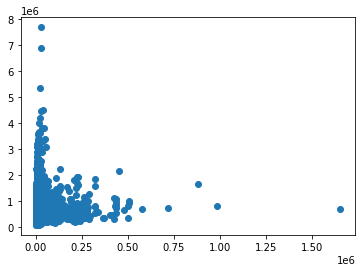

In [25]:
# A scatter plot between house price and sqft_lot
plt.scatter(x = house["sqft_lot"], y = house["price"])

#### Correlation betwen Price and other variables:

<AxesSubplot:>

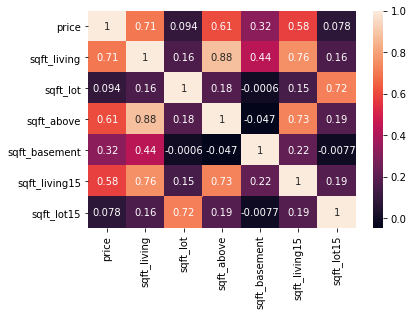

In [26]:
# Heat map which gives correlation between pairs of Continuous variables along with price
sns.heatmap(house[["price"]+Continuous].corr(),annot=True)

<AxesSubplot:>

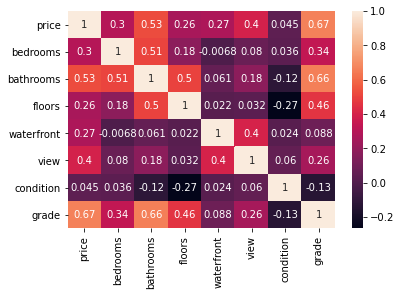

In [27]:
# Heat map which gives correlation between pairs of Discrete variables along with price
sns.heatmap(house[["price"] + Discrete].corr(), annot=True)

#### Observations based on EDA:    <a id='4' >  </a>

1. Based on the heatmap it can be seen that there is a strong positive correlation between Price and sqft_living, sqft_above, sqft_living15, bathrooms, grade.


2. From the barplots it is evident that view, bedrooms, floors, waterfront have do impact price of the house.


3. As opposed to our hypothesis earlier, sqft_lot has a weak correlation with price of the house.


4. Price of houses did not consistently increase with the Condition of the house.


5. sqft_basement and bedrooms had relatively lesser correlation with price when compared to sqft_above and bathrooms respectively.

## 3) Initial model fitting step    <a id='5' >  </a>

In this step we fit Linear Regression model on two sets of predictors which we feel play significant role in deciding price of the house.


For **Model-1** variables with strong positive correlation with price are selected as predictors.

Model - 1:   Predictors $ X_{1} $ = house[ [ "bathrooms", "grade", "sqft_living", "sqft_above", "sqft_living15" ] ]

   Target variable     $ y_{1} $ = house["price"]
   
For **Model-2** variables with significant correlation with price are selected as predictors.


Model - 2:   Predictors $ X_{2} $ = house[ [ "bedrooms", "bathrooms", "floors", "waterfront", "view", "grade", "sqft_living", "sqft_living15", "sqft_above", "sqft_basement" ] ]

Target variable        $ y_{2} $ = house["price"]

### Model-1:                <a id='6' >  </a>

In [28]:
# List of features
X1 = house[["bathrooms","grade","sqft_living","sqft_above","sqft_living15"]]

# Target variable
y1 = house["price"]

In [29]:
# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train1 = (X1 - np.mean(X1))/(np.std(X1))
y_train1 = y1

In [31]:
# Linear Regression object
model = LinearRegression()

In [32]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score1 = cross_validate(model, X_train1, y_train1, cv = 10, 
                            scoring=["r2","neg_root_mean_squared_error"])

val_score1

{'fit_time': array([1.44606495, 0.        , 0.01201105, 0.00729012, 0.00692201,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'score_time': array([0.01771355, 0.02114391, 0.00920081, 0.00805378, 0.        ,
        0.01655149, 0.        , 0.        , 0.01665974, 0.        ]),
 'test_r2': array([0.5184046 , 0.55770171, 0.5043738 , 0.56497332, 0.46868089,
        0.52962264, 0.55828268, 0.5381245 , 0.5595291 , 0.56791205]),
 'test_neg_root_mean_squared_error': array([-254920.39952512, -277577.9077014 , -220612.6174847 ,
        -301256.32076282, -277823.81634856, -256584.52112184,
        -223414.33483467, -252570.86923273, -255660.53679381,
        -243871.20199327])}

In [33]:
# R2 and RMSE of 10-fold cross validation
val_score1["test_r2"].mean() , val_score1["test_neg_root_mean_squared_error"].mean()

(0.5367605284823294, -256429.25257989197)

Model - 1 returned an $ R^{2} $ value of 0.5367 and an RMSE value of -256429.252. So the model is % accurate.

### Model-2:                     <a id='7' >  </a>

In [34]:
# List of features
X2 = house[["bedrooms","bathrooms","floors","waterfront","view","grade","sqft_living","sqft_living15","sqft_above",
            "sqft_basement"]]

# Target variable
y2 = house["price"]

In [35]:
# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train2 = (X2 - np.mean(X2))/(np.std(X2))
y_train2 = y2

In [36]:
# Linear Regression object
model = LinearRegression()

In [37]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score2 = cross_validate(model, X_train2, y_train2, cv = 10, 
                            scoring=["r2","neg_root_mean_squared_error"])

val_score2

{'fit_time': array([0.00965142, 0.00099611, 0.00861621, 0.0091188 , 0.00202417,
        0.00760293, 0.        , 0.0057857 , 0.00663543, 0.00801396]),
 'score_time': array([0.00199485, 0.00801325, 0.        , 0.00572133, 0.        ,
        0.        , 0.00984669, 0.        , 0.00099778, 0.00486016]),
 'test_r2': array([0.58191145, 0.64511876, 0.53327484, 0.6334124 , 0.50514853,
        0.57623191, 0.60356204, 0.59660983, 0.59740306, 0.61509133]),
 'test_neg_root_mean_squared_error': array([-237518.56585005, -248638.73746398, -214083.80874301,
        -276545.82394894, -268119.9848544 , -243540.60216528,
        -211653.97766083, -236038.82897782, -244422.01479065,
        -230172.4207536 ])}

In [38]:
# R2 and RMSE of 10-fold cross validation
val_score2["test_r2"].mean() , val_score2["test_neg_root_mean_squared_error"].mean()

(0.588776415894342, -241073.4765208569)

\begin{equation}
 adjustedR^{2} = 1 - \dfrac{(1 - R^{2})(n-1)}{(n-p-1)} 
\end{equation}

where n is sample size and p is no.of independent variables.

In [40]:
# Adjusted R2
n = len(X_train2)   # Sample size
p = len(X2.columns) # No.of columns in training data

adj_r2 = 1-(1-val_score2["test_r2"].mean())*(n-1)/(n-p-1)

adj_r2

0.5883546481157722

Model - 2 returned an $ R^{2} $ value of 0.5887 and an RMSE value of -241073.476. So the model is 58.88 % accurate. One can also notice an increase in $ R^{2} $ value and a decrease in RMSE value when compared to Model 1 as more positively correlated variables are incorporated into the set of predictors. The efficiency of newly added predictors is confirmed by adjusted $ R^{2} $ value.

## 4) Feature engineering                <a id='8' >  </a>

### A. Feature Transformations                  <a id='9' >  </a>

In [41]:
# Correlation between price and sqft_lot
house["price"].corr(house["sqft_lot"])

0.09414550486097559

In [42]:
# Change in Correlation between price and log(sqft_lot)
house["price"].corr(np.log(house["sqft_lot"]))

0.16961185708413776

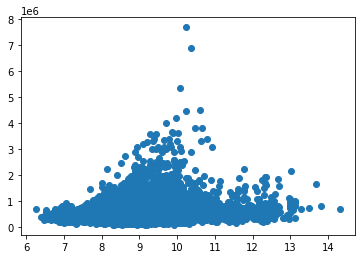

In [43]:
# Scatter plot between log(sqft_lot) and price
plt.scatter(x = np.log(house["sqft_lot"]), y = house["price"])

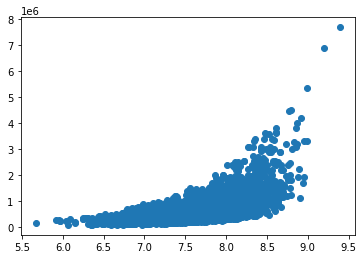

In [44]:
# Scatter plot between log(sqft_living) and price
plt.scatter(x = np.log(house["sqft_living"]), y = house["price"])

In [45]:
# Adding new column log_sqft_living to the dataframe
house["log_sqft_living"] = np.log(house["sqft_living"])

In [46]:
# Adding new column log_sqft_lot to the dataframe
house["log_sqft_lot"] = np.log(house["sqft_lot"])

In [47]:
# Adding new column Difference in area which is difference between sqft_lot and sqft_living to the dataframe
house["Difference in area"] = house["sqft_lot"] - house["sqft_living"]

In [48]:
# Converting yr_renovated column to a binary categorical variable
house["yr_renovated"][house["yr_renovated"]>0]=1

<ipython-input-48-0d7e8426a078>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house["yr_renovated"][house["yr_renovated"]>0]=1


**Testing Linear Regression model by adding transformed features:**

**1. sqft_living is replaced with log_sqft_living and a new variable log_sqft_lot is added to predictor set**

In [49]:
# List of features
X3 = house[["bedrooms","bathrooms","floors","waterfront","view","grade","log_sqft_living","sqft_living15","sqft_above",
           "log_sqft_lot","sqft_basement"]]

# Target variable
y3 = house["price"]

In [50]:
# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train3 = (X3 - np.mean(X3))/(np.std(X3))
y_train3 = y3

In [51]:
# Linear Regression object
model = LinearRegression()

In [52]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score3 = cross_validate(model, X_train3, y_train3, cv = 10, scoring=["r2","neg_root_mean_squared_error"])

val_score3

{'fit_time': array([0.00634432, 0.00801063, 0.        , 0.00867367, 0.        ,
        0.00767803, 0.00801158, 0.01338291, 0.00655675, 0.0070703 ]),
 'score_time': array([0.00792551, 0.00859404, 0.00800991, 0.        , 0.0090971 ,
        0.        , 0.        , 0.00594068, 0.        , 0.00446463]),
 'test_r2': array([0.62583998, 0.68262067, 0.56644375, 0.71796638, 0.59596699,
        0.62341207, 0.63836797, 0.63314485, 0.64850717, 0.61582068]),
 'test_neg_root_mean_squared_error': array([-224694.33182351, -235134.62501592, -206336.44392003,
        -242565.29434862, -242270.3016292 , -229583.37902182,
        -202149.31029965, -225096.16972532, -228382.76148938,
        -229954.24679737])}

In [53]:
# R2 and RMSE of 10-fold cross validation
val_score3["test_r2"].mean() , val_score3["test_neg_root_mean_squared_error"].mean()

(0.6348090515734187, -226616.68640708114)

In [54]:
# Adjusted R2
n = len(X_train3)   # Sample size
p = len(X3.columns) # No.of columns in training data

adj_r2 = 1-(1-val_score3["test_r2"].mean())*(n-1)/(n-p-1)

adj_r2

0.6343969990108285

**2. Modified yr_renovated variable is added to the set of predictors.**

In [55]:
# List of features
X4 = house[["bedrooms","bathrooms","floors","waterfront","view","grade","log_sqft_living","sqft_living15","sqft_above",
           "log_sqft_lot","sqft_basement","yr_renovated"]]

# Target variable
y4 = house["price"]

In [56]:
# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train4 = (X4 - np.mean(X4))/(np.std(X4))
y_train4 = y4

In [57]:
# Linear Regression object
model = LinearRegression()

In [58]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score4 = cross_validate(model, X_train4, y_train4, cv = 10, scoring=["r2","neg_root_mean_squared_error"])

val_score4

{'fit_time': array([0.01053238, 0.00100207, 0.        , 0.00760269, 0.        ,
        0.01195312, 0.00570703, 0.01092243, 0.01077485, 0.00800085]),
 'score_time': array([0.00807953, 0.00769663, 0.00815129, 0.00364566, 0.        ,
        0.        , 0.        , 0.        , 0.00705218, 0.        ]),
 'test_r2': array([0.62875035, 0.68585222, 0.57283667, 0.72493257, 0.60321501,
        0.63129196, 0.64354079, 0.63532991, 0.65101837, 0.61885049]),
 'test_neg_root_mean_squared_error': array([-223818.74351833, -233934.49350339, -204809.54812605,
        -239550.89826452, -240087.40172036, -227168.73162556,
        -200698.32076199, -224424.81225207, -227565.46960802,
        -229045.6910737 ])}

In [59]:
# R2 and RMSE of 10-fold cross validation
val_score4["test_r2"].mean() , val_score4["test_neg_root_mean_squared_error"].mean()

(0.6395618346268603, -225110.41104540034)

In [60]:
# Adjusted R2
n = len(X_train4)          # Sample size
p = len(X4.columns)        # No.of columns in training data

adj_r2 = 1-(1-val_score4["test_r2"].mean())*(n-1)/(n-p-1)

adj_r2

0.6391181274064585

**3. Difference in area is added to predictor set.**

In [61]:
# List of features
X5 = house[["bedrooms","bathrooms","floors","waterfront","view","grade","log_sqft_living","sqft_living15","sqft_above",
           "log_sqft_lot","sqft_basement","yr_renovated","Difference in area"]]

# Target variable
y5 = house["price"]

In [62]:
# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train5 = (X5 - np.mean(X5))/(np.std(X5))
y_train5 = y5

In [63]:
# Linear Regression object
model = LinearRegression()

In [64]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score5 = cross_validate(model, X_train5, y_train5, cv = 10, scoring=["r2","neg_root_mean_squared_error"])

val_score5

{'fit_time': array([0.0054698 , 0.00799036, 0.00911736, 0.00760841, 0.00801158,
        0.00971746, 0.00847816, 0.00703669, 0.01566339, 0.        ]),
 'score_time': array([0.00852919, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00099635, 0.        ]),
 'test_r2': array([0.63172765, 0.68587217, 0.57696018, 0.7261428 , 0.60445703,
        0.63337216, 0.64546955, 0.63516291, 0.65282122, 0.61206757]),
 'test_neg_root_mean_squared_error': array([-222919.46038008, -233927.06781122, -203818.61257226,
        -239023.33431376, -239711.34446479, -226526.99599482,
        -200154.60758961, -224476.19342024, -226976.90351778,
        -231074.74600125])}

In [65]:
# R2 and RMSE of 10-fold cross validation
val_score5["test_r2"].mean() , val_score5["test_neg_root_mean_squared_error"].mean()

(0.6404053251956473, -224860.92660658038)

### It can be noted there's not much increase in adjusted $R^{2}$ when compared to earlier predictor set. Therefore the new predictor Difference in area can be omitted.

In [66]:
# Adjusted R2
n = len(X_train5)       # Sample size
p = len(X5.columns)     # No.of columns in training data

adj_r2 = 1-(1-val_score5["test_r2"].mean())*(n-1)/(n-p-1)

adj_r2

0.6399257180578144

### B. New Feature Generation           <a id='10' >  </a>

In [67]:
# A new column "No.of years" is added to the dataframe which gives the age of the house.
house["No.of years"] = 2021 - house["yr_built"]

**4. yr_built is changed into age of house and added to predictor set.**

In [68]:
# List of features
X6 = house[["bedrooms","bathrooms","floors","waterfront","view","grade","log_sqft_living","sqft_living15","sqft_above",
           "log_sqft_lot","sqft_basement","yr_renovated","No.of years"]]

# Target variable
y6 = house["price"]

In [70]:
# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train6 = (X6 - np.mean(X6))/(np.std(X6))
y_train6 = y6

In [71]:
# Linear Regression object
model = LinearRegression()

In [72]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score6 = cross_validate(model, X_train6, y_train6, cv = 10, scoring=["r2","neg_root_mean_squared_error"])

val_score6

{'fit_time': array([0.00671768, 0.        , 0.0085423 , 0.00801277, 0.00362921,
        0.00776863, 0.00800943, 0.00297856, 0.00801563, 0.00956893]),
 'score_time': array([0.00692987, 0.00820494, 0.        , 0.00649858, 0.00534129,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'test_r2': array([0.6629998 , 0.73297207, 0.64000812, 0.75995265, 0.64662938,
        0.68516064, 0.69875964, 0.67652633, 0.69070086, 0.64233903]),
 'test_neg_root_mean_squared_error': array([-213244.82949801, -215677.88433272, -188018.0618276 ,
        -223782.78683659, -226572.3824021 , -209919.00464599,
        -184499.58739017, -211368.50071333, -214236.97980784,
        -221875.94327263])}

In [73]:
# R2 and RMSE of 10-fold cross validation
val_score6["test_r2"].mean() , val_score6["test_neg_root_mean_squared_error"].mean()

(0.6836048513930923, -210919.59607269862)

In [74]:
# Adjusted R2
n = len(X_train6)             # Sample size
p = len(X6.columns)           # No.of columns in training data

adj_r2 = 1-(1-val_score6["test_r2"].mean())*(n-1)/(n-p-1)

adj_r2

0.6831828613518602

**One-hot encoding:**

Each zipcode is assigned as a dummy variable, which gives 70 additional columns of 0s and 1s.

In [75]:
# One-hot encoding object
O=OneHotEncoder(handle_unknown='ignore')
# Zipcode column in house dataframe is turned into binary categorical with each of the 70 columns having 0s and 1s
# and converted to a dataframe
a=pd.DataFrame(O.fit_transform(house[['zipcode']]).toarray()) #,data.bedrooms

# A new dataframe is created by adding one-hot encoded columns to house dataframe.
new_df=house.join(a)


new_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft_living,log_sqft_lot,Difference in area,No.of years,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7.580700,8.517193,3040,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,8.597851,11.532042,96510,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,7.056175,8.699515,4840,79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,7.265430,9.898525,18471,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,7.222566,9.177817,8310,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#new_df.columns

In [76]:
# List of features
X7 = new_df[[      'bedrooms',          'bathrooms',      
                   'floors',         'waterfront',
                     'view',                        'grade',
               'sqft_above',      'sqft_basement',
             'yr_renovated',      'sqft_living15',      
          'log_sqft_living',       'log_sqft_lot',
              'No.of years',                    0,                    1,
                          2,                    3,                    4,
                          5,                    6,                    7,
                          8,                    9,                   10,
                         11,                   12,                   13,
                         14,                   15,                   16,
                         17,                   18,                   19,
                         20,                   21,                   22,
                         23,                   24,                   25,
                         26,                   27,                   28,
                         29,                   30,                   31,
                         32,                   33,                   34,
                         35,                   36,                   37,
                         38,                   39,                   40,
                         41,                   42,                   43,
                         44,                   45,                   46,
                         47,                   48,                   49,
                         50,                   51,                   52,
                         53,                   54,                   55,
                         56,                   57,                   58,
                         59,                   60,                   61,
                         62,                   63,                   64,
                         65,                   66,                   67,
                         68,                   69]]

# Target variable
y7 = new_df["price"]

In [77]:
# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train7 = (X7 - np.mean(X7))/(np.std(X7))
y_train7 = y7

In [78]:
# Linear Regression object
model = LinearRegression()

In [79]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score7 = cross_validate(model, X_train7, y_train7, cv = 10, scoring=["r2","neg_root_mean_squared_error"])

val_score7

{'fit_time': array([0.17459297, 0.04961681, 0.01661849, 0.01774573, 0.03256273,
        0.01768923, 0.03235531, 0.03323054, 0.05085659, 0.03286743]),
 'score_time': array([0.01656985, 0.01561832, 0.01640987, 0.        , 0.        ,
        0.01548409, 0.        , 0.        , 0.        , 0.01525998]),
 'test_r2': array([0.80308045, 0.83930867, 0.82588803, 0.82017072, 0.7789968 ,
        0.82072599, 0.83566654, 0.84055532, 0.8069885 , 0.82079551]),
 'test_neg_root_mean_squared_error': array([-163007.59503357, -167310.61302343, -130757.77664958,
        -193690.54366921, -179180.61872686, -158403.91534172,
        -136270.49003363, -148397.23552573, -169237.53120194,
        -157053.95719947])}

In [80]:
# R2 and RMSE of 10-fold cross validation
val_score7["test_r2"].mean() , val_score7["test_neg_root_mean_squared_error"].mean()

(0.8192176548249537, -160331.027640514)

In [81]:
# Adjusted R2
n = len(X_train7)       # Sample size
p = len(X7.columns)     # No.of columns in training data

adj_r2 = 1-(1-val_score7["test_r2"].mean())*(n-1)/(n-p-1)

adj_r2

0.8176670777194945

## 5) Model fitting step 2          <a id='11' >  </a>

### Forward selection:                 <a id='12' >  </a>

In [ ]:
!pip install mlxtend

In [82]:
# Library for Forward selection or backward elimination
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [83]:
# Linear Regression object
lreg = LinearRegression()

# Forward selection with no.of features fixed to 13
sfs1 = sfs(lreg, k_features=13, forward=True, verbose=1, scoring='r2')

**Without including one-hot encoded variables:**

In [84]:
# List of features
X = house.drop(['id','date','lat','long','price','yr_built','zipcode','sqft_living','sqft_lot'],axis=1)

# Target variable
y = house["price"]

In [85]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished
Features: 1/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
Features: 2/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished
Features: 3/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
Features: 4/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
Features: 5/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished
Features: 6/13[Parallel(

In [86]:
# List of final features obtained.
list(sfs1.k_feature_names_)

['bedrooms',
 'bathrooms',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'log_sqft_living',
 'log_sqft_lot',
 'Difference in area',
 'No.of years']

In [87]:
# R2 of the model
sfs1.k_score_

0.6928661902469936

### Backward elimination:                      <a id='13' >  </a>

In [ ]:
!pip install mlxtend

In [88]:
# Library for Forward selection or backward elimination
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [89]:
# Linear Regression object
lreg = LinearRegression()

# Forward selection with no.of features fixed to 13
sfs1 = sfs(lreg, k_features=13, forward=False, verbose=1, scoring='r2')

**Without including one-hot encoded variables:**

In [90]:
# List of features
X = house.drop(['id','date','lat','long','price','yr_built','zipcode','sqft_living','sqft_lot'],axis=1)

# Target variable
y = house["price"]

In [91]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished
Features: 15/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished
Features: 14/13[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished
Features: 13/13

In [92]:
# List of final features obtained.
list(sfs1.k_feature_names_)

['bedrooms',
 'bathrooms',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'log_sqft_living',
 'log_sqft_lot',
 'Difference in area',
 'No.of years']

In [93]:
# R2 of the model.
sfs1.k_score_

0.6928661902469936

## 6) Model fitting step 3                 <a id='14' >  </a>

### Decision Tree:

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
# Decision Tree object
dt = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)

**Feature Set - 1:**

In [96]:
# List of features
X1 = house[["bathrooms","grade","sqft_living","sqft_above","sqft_living15"]]

# Target variable
y1 = house["price"]

# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train1 = (X1 - np.mean(X1))/(np.std(X1))
y_train1 = y1

In [97]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score_dt1 = cross_validate(dt, X_train1, y_train1, cv = 10, 
                                scoring = ['neg_root_mean_squared_error','r2'])

val_score_dt1

{'fit_time': array([0.25012589, 0.01683807, 0.01687026, 0.01675773, 0.01677585,
        0.        , 0.        , 0.01677537, 0.01568437, 0.        ]),
 'score_time': array([0.00729418, 0.        , 0.        , 0.        , 0.        ,
        0.01566553, 0.        , 0.        , 0.        , 0.01641536]),
 'test_neg_root_mean_squared_error': array([-244647.47547441, -284786.39714457, -262372.50170584,
        -295793.00939081, -266001.105318  , -282145.00565857,
        -252490.33519857, -255587.5764588 , -265274.25051618,
        -259290.5530024 ]),
 'test_r2': array([0.5564377 , 0.53443112, 0.29898034, 0.58060874, 0.51293898,
        0.43123844, 0.43582755, 0.52702533, 0.52577983, 0.51154506])}

In [98]:
# R2 and RMSE of 10-fold cross validation
val_score_dt1['test_r2'].mean(), val_score_dt1['test_neg_root_mean_squared_error'].mean()

(0.49148130837159715, -266838.8209868153)

**Feature Set - 2:**

In [99]:
# List of features
X2 = house[["bedrooms","bathrooms","floors","waterfront","view","grade","sqft_living","sqft_living15","sqft_above",
            "sqft_basement"]]

# Target variable
y2 = house["price"]

# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train2 = (X2 - np.mean(X2))/(np.std(X2))
y_train2 = y2

In [100]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score_dt2 = cross_validate(dt, X_train2, y_train2, cv = 10, 
                                scoring = ['neg_root_mean_squared_error','r2'])

val_score_dt2

{'fit_time': array([0.0158329 , 0.01691008, 0.00649333, 0.00714755, 0.01546144,
        0.01267648, 0.00858116, 0.00829768, 0.01759863, 0.        ]),
 'score_time': array([0.        , 0.00099659, 0.00852919, 0.01232147, 0.        ,
        0.        , 0.00866556, 0.        , 0.        , 0.        ]),
 'test_neg_root_mean_squared_error': array([-243451.66825666, -282807.74470633, -258430.14600694,
        -328599.6501813 , -263895.00415563, -277740.34860201,
        -252400.5675952 , -253287.77082831, -263799.53819348,
        -265110.94875377]),
 'test_r2': array([0.56076326, 0.54087805, 0.31988882, 0.48241968, 0.52062119,
        0.44885807, 0.43622863, 0.53549879, 0.53103774, 0.48936986])}

In [101]:
# R2 and RMSE of 10-fold cross validation
val_score_dt2['test_r2'].mean(), val_score_dt2['test_neg_root_mean_squared_error'].mean()

(0.4865564100426246, -268952.33872796287)

**Feature Set - 3:**

In [102]:
# List of features
X3 = house[["bedrooms","bathrooms","floors","waterfront","view","grade","log_sqft_living","sqft_living15","sqft_above",
           "log_sqft_lot","sqft_basement"]]

# Target variable
y3 = house["price"]

# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train3 = (X3 - np.mean(X3))/(np.std(X3))
y_train3 = y3

In [103]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score_dt3 = cross_validate(dt, X_train3, y_train3, cv = 10, 
                                scoring = ['neg_root_mean_squared_error','r2'])

val_score_dt3

{'fit_time': array([0.01317453, 0.01570392, 0.01798296, 0.01815248, 0.00577426,
        0.00672102, 0.0081265 , 0.0058949 , 0.        , 0.00946879]),
 'score_time': array([0.00648499, 0.        , 0.        , 0.00905108, 0.0092566 ,
        0.00808167, 0.00985956, 0.00902247, 0.01582909, 0.        ]),
 'test_neg_root_mean_squared_error': array([-243451.66825666, -282807.74470633, -258430.14600694,
        -328599.6501813 , -263895.00415563, -277740.34860201,
        -252400.5675952 , -253287.77082831, -263799.53819348,
        -265110.94875377]),
 'test_r2': array([0.56076326, 0.54087805, 0.31988882, 0.48241968, 0.52062119,
        0.44885807, 0.43622863, 0.53549879, 0.53103774, 0.48936986])}

In [104]:
# R2 and RMSE of 10-fold cross validation
val_score_dt3['test_r2'].mean(), val_score_dt3['test_neg_root_mean_squared_error'].mean()

(0.4865564100426246, -268952.33872796287)

**Feature Set - 4:**

In [105]:
# List of features
X4 = house[["bedrooms","bathrooms","floors","waterfront","view","grade","log_sqft_living","sqft_living15","sqft_above",
           "log_sqft_lot","sqft_basement","yr_renovated"]]

# Target variable
y4 = house["price"]

# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train4 = (X4 - np.mean(X4))/(np.std(X4))
y_train4 = y4

In [106]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score_dt4 = cross_validate(dt, X_train4, y_train4, cv = 10, 
                                scoring = ['neg_root_mean_squared_error','r2'])

val_score_dt4

{'fit_time': array([0.01822877, 0.01093221, 0.01607633, 0.01592183, 0.01403689,
        0.01555681, 0.01694751, 0.        , 0.        , 0.00099683]),
 'score_time': array([0.        , 0.00804663, 0.00571942, 0.00413036, 0.        ,
        0.        , 0.00103188, 0.01671147, 0.01555324, 0.        ]),
 'test_neg_root_mean_squared_error': array([-243451.66825666, -282807.74470633, -258430.14600694,
        -328599.6501813 , -263895.00415563, -277740.34860201,
        -252400.5675952 , -253287.77082831, -263799.53819348,
        -265110.94875377]),
 'test_r2': array([0.56076326, 0.54087805, 0.31988882, 0.48241968, 0.52062119,
        0.44885807, 0.43622863, 0.53549879, 0.53103774, 0.48936986])}

In [107]:
# R2 and RMSE of 10-fold cross validation
val_score_dt4['test_r2'].mean(), val_score_dt4['test_neg_root_mean_squared_error'].mean()

(0.4865564100426246, -268952.33872796287)

**Feature Set - 5:**

In [108]:
# List of features
X5 = house[["bedrooms","bathrooms","floors","waterfront","view","grade","log_sqft_living","sqft_living15","sqft_above",
           "log_sqft_lot","sqft_basement","yr_renovated","Difference in area"]]

# Target variable
y5 = house["price"]

# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train5 = (X5 - np.mean(X5))/(np.std(X5))
y_train5 = y5

In [109]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score_dt5 = cross_validate(dt, X_train5, y_train5, cv = 10, 
                                scoring = ['neg_root_mean_squared_error','r2'])

val_score_dt5

{'fit_time': array([0.01980305, 0.01749992, 0.01856327, 0.02335882, 0.01689029,
        0.01676846, 0.00805235, 0.01530647, 0.01056218, 0.0236547 ]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0157268 , 0.00099826, 0.01568174, 0.        ]),
 'test_neg_root_mean_squared_error': array([-243451.66825666, -282807.74470633, -258430.14600694,
        -328599.6501813 , -263895.00415563, -277740.34860201,
        -252400.5675952 , -253287.77082831, -263799.53819348,
        -265110.94875377]),
 'test_r2': array([0.56076326, 0.54087805, 0.31988882, 0.48241968, 0.52062119,
        0.44885807, 0.43622863, 0.53549879, 0.53103774, 0.48936986])}

In [110]:
# R2 and RMSE of 10-fold cross validation
val_score_dt5['test_r2'].mean(), val_score_dt5['test_neg_root_mean_squared_error'].mean()

(0.4865564100426246, -268952.33872796287)

**Feature Set - 6:**

In [111]:
# List of features
X6 = house[["bedrooms","bathrooms","floors","waterfront","view","grade","log_sqft_living","sqft_living15","sqft_above",
           "log_sqft_lot","sqft_basement","yr_renovated","No.of years"]]

# Target variable
y6 = house["price"]

# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train6 = (X6 - np.mean(X6))/(np.std(X6))
y_train6 = y6

In [112]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score_dt6 = cross_validate(dt, X_train6, y_train6, cv = 10, 
                                                      scoring = ['neg_root_mean_squared_error','r2'])

val_score_dt6

{'fit_time': array([0.02332282, 0.01649284, 0.01885152, 0.01943231, 0.01690149,
        0.01533008, 0.01674533, 0.01677418, 0.01655149, 0.01773024]),
 'score_time': array([0.        , 0.00804377, 0.00354624, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'test_neg_root_mean_squared_error': array([-246365.76460388, -283840.58595644, -258430.14600694,
        -327464.96974592, -255559.7627944 , -282044.39594291,
        -252400.5675952 , -250801.92677864, -259956.65337231,
        -261289.00218503]),
 'test_r2': array([0.55018508, 0.53751841, 0.31988882, 0.485988  , 0.55042573,
        0.43164399, 0.43622863, 0.54457156, 0.54460138, 0.50398663])}

In [113]:
# R2 and RMSE of 10-fold cross validation
val_score_dt6['test_r2'].mean(),val_score_dt6['test_neg_root_mean_squared_error'].mean()

(0.49050382531924086, -267815.37749816803)

**Feature Set - 7:**

In [114]:
# List of features
X7 = new_df[[      'bedrooms',          'bathrooms',      
                   'floors',         'waterfront',
                     'view',                        'grade',
               'sqft_above',      'sqft_basement',
             'yr_renovated',      'sqft_living15',      
          'log_sqft_living',       'log_sqft_lot',
              'No.of years',                    0,                    1,
                          2,                    3,                    4,
                          5,                    6,                    7,
                          8,                    9,                   10,
                         11,                   12,                   13,
                         14,                   15,                   16,
                         17,                   18,                   19,
                         20,                   21,                   22,
                         23,                   24,                   25,
                         26,                   27,                   28,
                         29,                   30,                   31,
                         32,                   33,                   34,
                         35,                   36,                   37,
                         38,                   39,                   40,
                         41,                   42,                   43,
                         44,                   45,                   46,
                         47,                   48,                   49,
                         50,                   51,                   52,
                         53,                   54,                   55,
                         56,                   57,                   58,
                         59,                   60,                   61,
                         62,                   63,                   64,
                         65,                   66,                   67,
                         68,                   69]]

# Target variable
y7 = new_df["price"]

# Standardisation to bring all variables on the same scale with mean 0 and std 1.
X_train7 = (X7 - np.mean(X7))/(np.std(X7))
y_train7 = y7

In [115]:
# 10-fold Cross validation with R2 and RMSE as scoring metrics
val_score_dt7 = sklearn.model_selection.cross_validate(dt, X_train7, y_train7, cv = 10, 
                                                      scoring = ['neg_root_mean_squared_error','r2'])

val_score_dt7

{'fit_time': array([0.04854798, 0.04048729, 0.0278194 , 0.03271151, 0.03433108,
        0.03241658, 0.032444  , 0.04595184, 0.03096199, 0.03001571]),
 'score_time': array([0.00585413, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00451756, 0.00331402, 0.00574684]),
 'test_neg_root_mean_squared_error': array([-246365.76460388, -283840.58595644, -258430.14600694,
        -327464.96974592, -255559.7627944 , -282044.39594291,
        -252400.5675952 , -250801.92677864, -259956.65337231,
        -261289.00218503]),
 'test_r2': array([0.55018508, 0.53751841, 0.31988882, 0.485988  , 0.55042573,
        0.43164399, 0.43622863, 0.54457156, 0.54460138, 0.50398663])}

In [116]:
# R2 and RMSE of 10-fold cross validation
val_score_dt7['test_r2'].mean(),val_score_dt7['test_neg_root_mean_squared_error'].mean()

(0.49050382531924086, -267815.37749816803)

## 7) Model testing                <a id='15' >  </a>

**The best competing models have been Linear Regression models.**

**Feature Set - 1:**

In [117]:
# Reading test dataset
test = pd.read_csv(r"E:\Data Science\D21- IML- Introduction to Machine Learning\kc_house_test_data.csv")

In [118]:
# List of features
X = house[["bedrooms","bathrooms","floors","waterfront","view","grade","log_sqft_living","sqft_living15","sqft_above",
           "log_sqft_lot","sqft_basement","yr_renovated","No.of years"]]

# Target variable
y = house["price"]

In [119]:
test["log_sqft_living"] = np.log(test["sqft_living"])
test["log_sqft_lot"] = np.log(test["sqft_lot"])
test["yr_renovated"][test["yr_renovated"]>0]=1
test["No.of years"] = 2021 - test["yr_built"]
test["Difference in area"] = test["sqft_lot"] - test["sqft_living"]

<ipython-input-119-f97bc5ff248b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["yr_renovated"][test["yr_renovated"]>0]=1


In [128]:
# Features to be tested on the model
X_test = test[["bedrooms","bathrooms","floors","waterfront","view","grade","log_sqft_living","sqft_living15","sqft_above",
           "log_sqft_lot","sqft_basement","yr_renovated","No.of years"]]

# Actual y-values
y_test = test["price"]

In [129]:
# Fitting Linear Regression model
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [130]:
# Predicting the house price
y_pred = model.predict(X_test)

In [131]:
# R2 of predicted model
sklearn.metrics.r2_score(y_test,y_pred)

0.6507088524263291

In [133]:
# RMSE of predicted model
np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred))

211782.853524571

**Conclusion:**

We used the feature set which gave us the maximum $R^{2}$ value while training data, to predict the house price. The model returned an $R^{2}$ value of 0.65 which is close to the value during training step. We used Forward selection method to arrive at ideal set of predictors and predicted the house prices of test data